In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42) #for not changing output while running every time so it will stay everytime we run

#choose file from the destop
from google.colab import files
uploaded = files.upload()

# the name of the file is .csv so but it is an excel file
file_name = "SampleSuperstore.csv (1).xlsx"  #name of the file to upload
df = pd.read_excel(file_name)
print(df.head())

#information of the data
print("Initial Data Overview:")
print(df.info())
print("\nShape:", df.shape)

# finding missing values
print("\nMissing values per column:")
print(df.isnull().sum())
#there is no missing values found

# remove any duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")
#there are 9994 rows and 13 columns in that there are 17 duplicates found
#after removing duplicates there are 9977 rows and 13 coloumns

# checking data types
print("\nData Types before formatting:")
print(df.dtypes)

# format column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nFormatted Column Names:", df.columns.tolist())
#formating column names by making to lowercase,removing unwanted spaces and replacing spaces " " with " _"

# Create derived features
df['profit_margin'] = (df['profit'] / df['sales']) * 100
#added profit margin column (profit/sales*100)

# Final check
print("\nFinal cleaned data info:")
print(df.info())
print("\nSample cleaned data:")
print(df.head())
#now there are 9977 rows and 14 columns

# Save cleaned data
df.to_csv("Cleaned_SampleSuperstore.csv", index=False)
#saved cleaned data to colab




















Saving SampleSuperstore.csv.xlsx to SampleSuperstore.csv (3).xlsx
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0 

Saving Cleaned_SampleSuperstore.csv to Cleaned_SampleSuperstore.csv


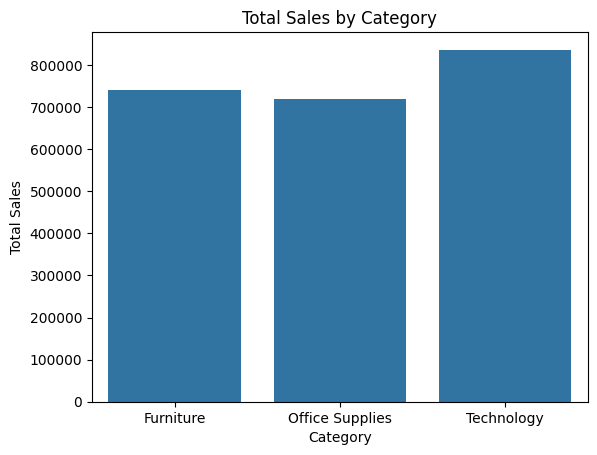

In [6]:
#imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#loading the file "Cleaned_SampleSuperstore.csv"
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Cleaned_SampleSuperstore.csv")#downloaded cleaned data from colab and loaded

sns.barplot(x='category', y='sales', data=df, estimator=sum, errorbar=None)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()
#category technology having highest sales



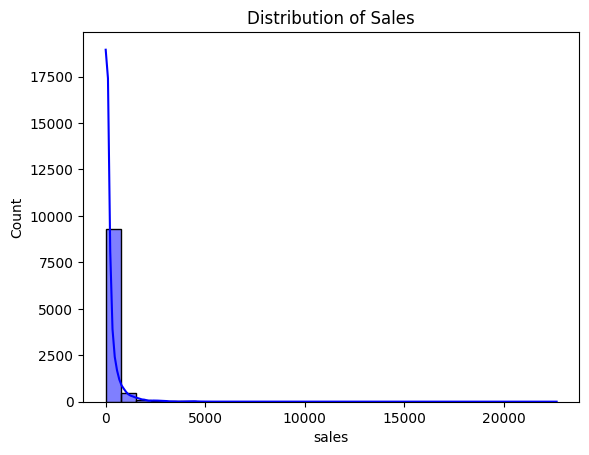

In [7]:
sns.histplot(df['sales'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sales")
plt.show()
#from this histogram we can understand that the majority of the sales are of low value than high value products


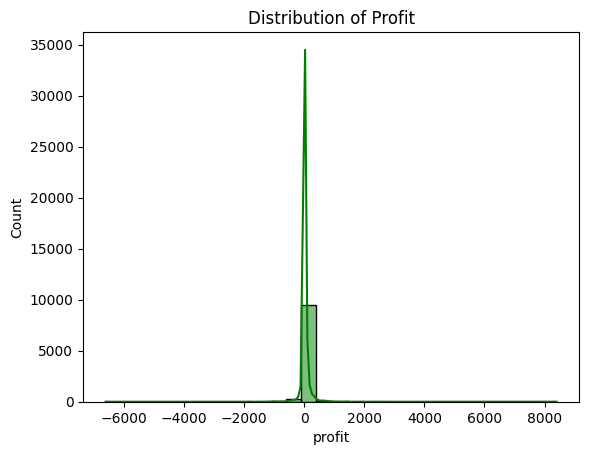

In [8]:
sns.histplot(df['profit'], bins=30, kde=True, color='green')
plt.title("Distribution of Profit")
plt.show()


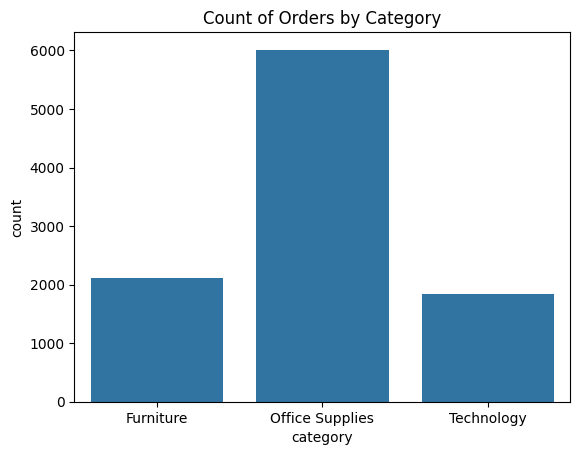

In [37]:
sns.countplot(x='category', data=df)
plt.title("Count of Orders by Category")
plt.show()
#maximum no of orders is from office supplies category

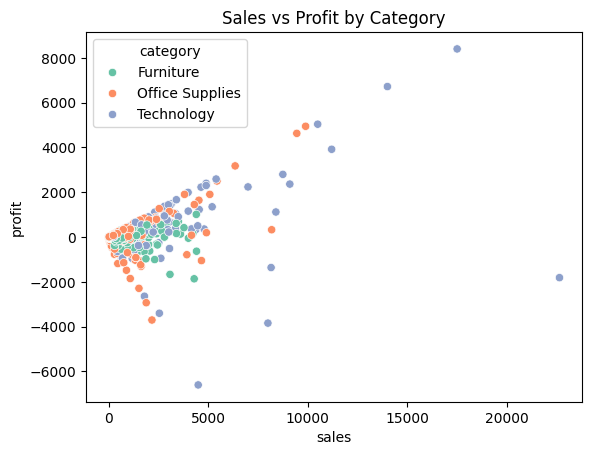

In [13]:
sns.scatterplot(x='sales', y='profit', data=df, hue='category', palette='Set2')
plt.title("Sales vs Profit by Category")
plt.show()
#from this scatteredplot we can understand techo;ogy having higher profit and sales
#furniture having lowest profit and somtime loss also occure
#in office supply there is moderate profit ans sales


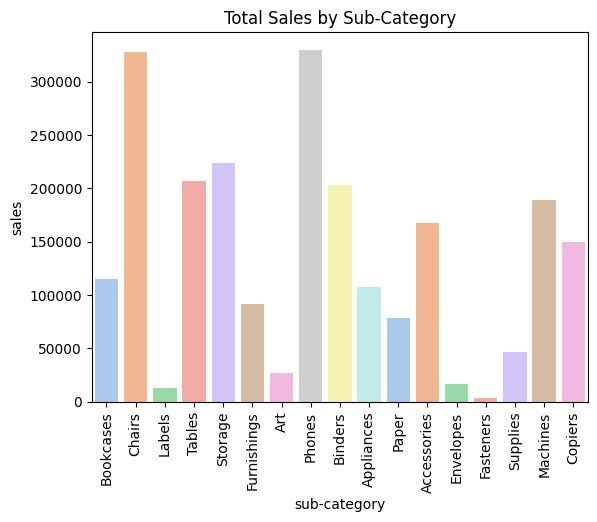

In [35]:
sns.barplot(x='sub-category', y='sales', data=df, estimator=sum, errorbar=None, hue='sub-category',palette='pastel')
plt.xticks(rotation=90)
plt.title("Total Sales by Sub-Category")
plt.show()
#chairs and phones having higher sales while fasterners having lower sales

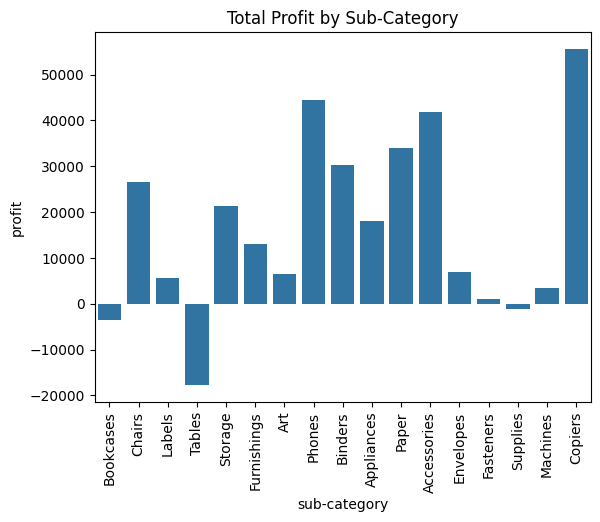

In [32]:
sns.barplot(x='sub-category', y='profit', data=df, estimator=sum,errorbar=None)
plt.xticks(rotation=90)
plt.title("Total Profit by Sub-Category")
plt.show()
#copiers have higher profit while tables are in loss (bookcases and suppliers are also in loss but far better than tables)

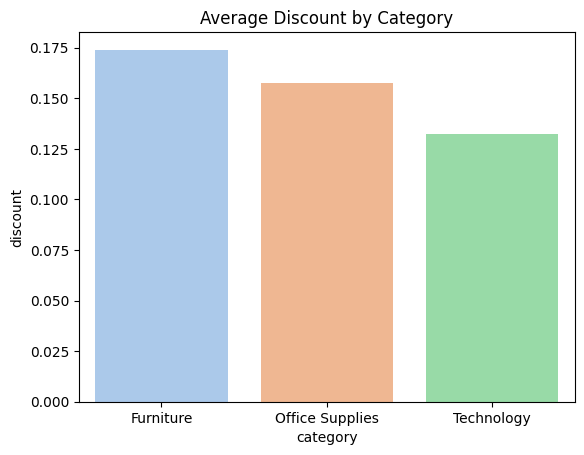

In [26]:
sns.barplot(x='category', y='discount', data=df, errorbar=None,hue='category', palette='pastel')
plt.title("Average Discount by Category")
plt.show()
#here furniture is getting more discount so that we can understand the they are having lower sales compared to others that is why suppliers are giving more discount


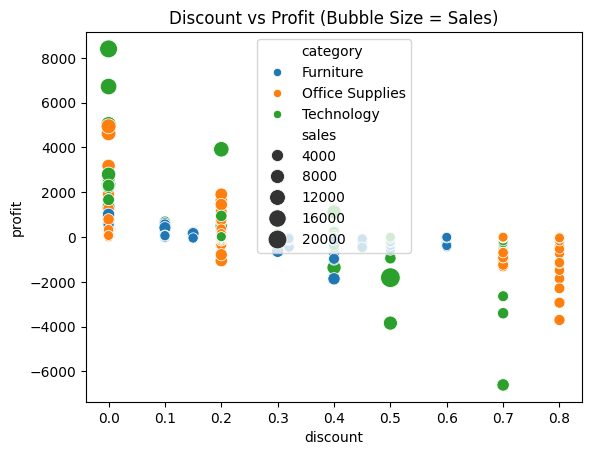

In [17]:
sns.scatterplot(x='discount', y='profit', size='sales', hue='category', data=df, sizes=(50, 200))
plt.title("Discount vs Profit (Bubble Size = Sales)")
plt.show()
#company should reduce their discount strategy otherwise it lead to reduce in profitabilty especially furniture and technology

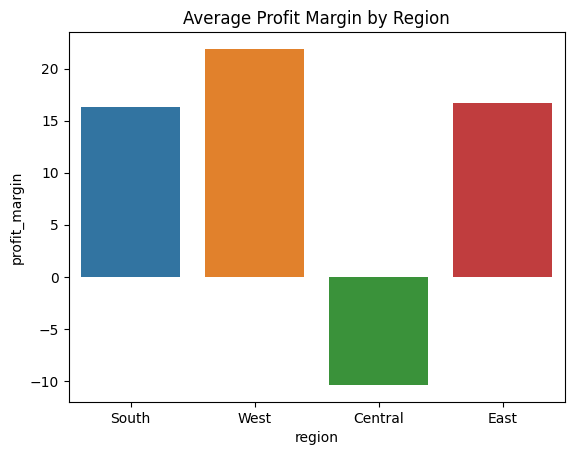

In [28]:
sns.barplot(x='region', y='profit_margin', data=df, estimator='mean',errorbar=None,hue='region')
plt.title("Average Profit Margin by Region")
plt.show()
#west region having higher profit margin while central is having loss